In [109]:
#Important libraries
from dateutil.parser import parse 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import matplotlib.font_manager
import seaborn as sns
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split

In [10]:
#We load the data
data=pd.read_csv("PM2.5_dataset.csv", parse_dates=['stime'])

In [11]:
data

,Unnamed: 0,station_id,stime,air_data_value,RH,UGRD,VGRD,HPBL,TMP,goes_measurement
0,0,06-011-0007,2019-01-02 20:00:00,17.0,31.600000,-2.106623,-1.797583,256.61905,282.81880,-0.005922
1,1,06-019-0500,2019-01-02 20:00:00,13.0,62.200000,1.205877,1.764917,337.49405,281.63130,0.087090
2,2,06-061-0003,2019-01-02 20:00:00,21.0,61.500000,1.518377,1.014917,270.61905,280.13130,0.094333
3,3,06-073-1201,2019-01-02 20:00:00,6.0,15.400001,2.080877,-1.610083,1009.30660,288.19380,-0.024185
4,4,06-079-2004,2019-01-02 20:00:00,7.0,50.700000,2.393377,-1.172583,460.43155,285.19380,-0.014013
...,...,...,...,...,...,...,...,...,...,...
31565,103560,49-035-4002,2019-10-30 23:00:00,6.3,25.500000,0.723850,-2.034275,892.42080,273.49664,0.054725
31566,103591,49-021-0005,2019-10-16 20:00:00,6.4,8.100000,6.964932,4.869552,1664.20080,297.60638,0.010030
31567,103592,49-035-4002,2019-10-16 20:00:00,8.5,8.900001,2.214932,4.682052,842.38837,297.60638,0.282129
31568,103594,49-035-4002,2019-10-16 21:00:00,8.1,8.300000,1.386543,5.465472,1292.07180,298.64655,0.233581


In [12]:
#We remove a redundant column
data=data.iloc[:,1:]

In [13]:
data

,station_id,stime,air_data_value,RH,UGRD,VGRD,HPBL,TMP,goes_measurement
0,06-011-0007,2019-01-02 20:00:00,17.0,31.600000,-2.106623,-1.797583,256.61905,282.81880,-0.005922
1,06-019-0500,2019-01-02 20:00:00,13.0,62.200000,1.205877,1.764917,337.49405,281.63130,0.087090
2,06-061-0003,2019-01-02 20:00:00,21.0,61.500000,1.518377,1.014917,270.61905,280.13130,0.094333
3,06-073-1201,2019-01-02 20:00:00,6.0,15.400001,2.080877,-1.610083,1009.30660,288.19380,-0.024185
4,06-079-2004,2019-01-02 20:00:00,7.0,50.700000,2.393377,-1.172583,460.43155,285.19380,-0.014013
...,...,...,...,...,...,...,...,...,...
31565,49-035-4002,2019-10-30 23:00:00,6.3,25.500000,0.723850,-2.034275,892.42080,273.49664,0.054725
31566,49-021-0005,2019-10-16 20:00:00,6.4,8.100000,6.964932,4.869552,1664.20080,297.60638,0.010030
31567,49-035-4002,2019-10-16 20:00:00,8.5,8.900001,2.214932,4.682052,842.38837,297.60638,0.282129
31568,49-035-4002,2019-10-16 21:00:00,8.1,8.300000,1.386543,5.465472,1292.07180,298.64655,0.233581


In [14]:
#Some basic statistics
data.describe()

,air_data_value,RH,UGRD,VGRD,HPBL,TMP,goes_measurement
count,31570.000000,31570.000000,31570.000000,31570.000000,31570.000000,31570.000000,31570.000000
mean,7.948898,42.447127,1.077064,0.459147,1109.665863,294.993541,0.360805
std,5.912331,21.691148,2.895799,2.927115,845.487755,9.300556,0.574477
min,2.000000,2.700000,-12.932089,-16.077074,19.441486,252.974610,-0.050000
25%,4.000000,24.800001,-0.811573,-1.375287,404.699665,289.247043,0.083083
50%,6.500000,40.400000,0.945436,0.298247,978.844550,295.964700,0.197401
75%,10.000000,58.100002,2.859779,2.253714,1607.010550,301.890297,0.408507
max,91.000000,100.000000,15.319673,13.251497,4843.839400,321.825350,4.999973


In [15]:
#Type of data of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31570 entries, 0 to 31569
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   station_id        31570 non-null  object        
 1   stime             31570 non-null  datetime64[ns]
 2   air_data_value    31570 non-null  float64       
 3   RH                31570 non-null  float64       
 4   UGRD              31570 non-null  float64       
 5   VGRD              31570 non-null  float64       
 6   HPBL              31570 non-null  float64       
 7   TMP               31570 non-null  float64       
 8   goes_measurement  31570 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 2.2+ MB


## Let's do the SVM

In [255]:
#Split the data into training and test set
train, test = train_test_split(data, test_size=.2) 

#We only focus on RH and goes_measurement
X_train_raw = train.loc[train['goes_measurement']<2.5,['RH','goes_measurement']].to_numpy() 
X_test_raw = test.loc[test['goes_measurement']<2.5,['RH','goes_measurement']].to_numpy() 
X_outliers_raw=data.loc[data['goes_measurement']>2.5,['RH','goes_measurement']].to_numpy()
outliers_prop = len(X_outliers) / len(data)

In [257]:
#We scale the data
X_train=preprocessing.scale(X_train_raw)
X_test=preprocessing.scale(X_test_raw)     
X_outliers=preprocessing.scale(X_outliers_raw)

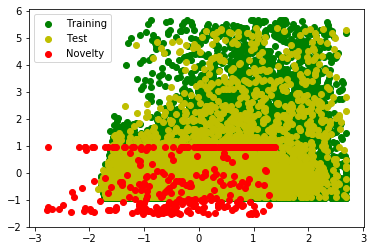

In [304]:
#We make plots of the training, test and novelty points
plt.scatter([a[0] for a in X_train],[a[1] for a in X_train], c="g", label="Training")
plt.scatter([a[0] for a in X_test],[a[1] for a in X_test], c="y", label="Test")
plt.scatter([a[0] for a in X_outliers],[a[1] for a in X_outliers], c="r", label="Novelty")
plt.legend()
plt.show()

In [299]:
#Train the model
clf = OneClassSVM(kernel='rbf',gamma='auto',nu=.32)
clf.fit(X_train)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='auto', kernel='rbf',
            max_iter=-1, nu=0.32, shrinking=True, tol=0.001, verbose=False)

In [302]:
def plot_oneclass_svm(svm):
    # Definimos una grilla de puntos sobre la cual vamos a determinar la frontera de detección de anomalías:
    xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-2, 6, 500))

    # Obtenemos la distancia con la frontera de decisión para cada punto
    Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.title("Fronteras de detección de anomalías (en rojo)")
    
    # Ploteamos fronteras y pintamos regiones interna y externa a la frontera
    plt.contourf(xx, yy, Z, levels=[Z.min(), 0], colors="gray") # Región anómala
    a = plt.contour(xx, yy, Z, levels=[0], linewidths=4, colors='red') # Fronteras de decisión
    plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred') # Región de tipicidad
    
    # Ploteamos los puntos de entrenamiento, test y anomalías
    s = 40
    b1 = plt.scatter(X_train[:, 0], X_train[:, 1], s=s, edgecolors='k', c="g") # Puntos de entrenamiento
    b2 = plt.scatter(X_test[:, 0], X_test[:, 1], s=s, edgecolors='k', c="y") # Puntos de Test
    c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], s=s, edgecolors='k', c="r") # Puntos excepcionales
    
    #Leyenda
    plt.axis('tight') # Solo el espacio necesario
    plt.xlim((-3, 3))
    plt.ylim((-2, 6))
    plt.legend([a.collections[0], b1, b2, c],
               ["Novelty frontier", "Training", "Test normal", "Test novelty"],
               loc="upper left",
               prop=matplotlib.font_manager.FontProperties(size=11))
    plt.show()
    
    # Calculamos accuracy del training, test positivos y negativos
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    y_pred_outliers = clf.predict(X_outliers)
    n_error_train = y_pred_train[y_pred_train == -1].size
    n_error_test = y_pred_test[y_pred_test == -1].size
    n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size
    
    print("Accuracy training set: "+str(1-n_error_train/len(X_train)))
    print("Recall (normal) test set: "+str(1-n_error_test/len(X_test)))
    print("Specificity (novelty) test set: "+str(1-n_error_outliers/len(X_outliers)))
    print("Accuracy all test set: "+ str(1-(n_error_test+n_error_outliers)/(len(X_test)+len(X_outliers))))

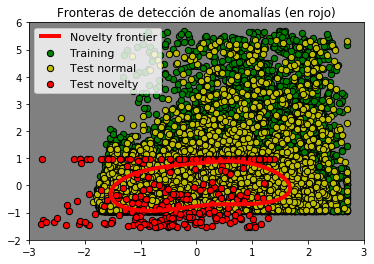

Accuracy training set: 0.6799807507218479
Recall (normal) test set: 0.68854033290653
Specificity (novelty) test set: 0.8134715025906736
Accuracy all test set: 0.6958094663852878


In [303]:
plot_oneclass_svm(clf)